# Principal Component Analysis (PCA)

PCA is an unsupervised technique that processes unlabelled data to restructure the columns of a dataframe. The primary use of PCA is dimensionality reduction, which reduces the number of columns without losing significant information. This streamlining of data has a notable secondary effect: it reduces noise. Noise in data refers to random variations or errors that obscure underlying patterns or signals, making it harder to extract meaningful information.

Noise reduction achieved through PCA helps to create better clusters, demonstrating why PCA is such a valuable unsupervised learning tool.

---
##1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Get the spreadsheet ID and name
sheet_id = "1CSkJ7w90AilX_zkl-2fDXBFq9MAL5hSDzkXRpE70pKE"
sheet_name = "2087670046"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `name` and only read the first 15 rows
songs_df = pd.read_csv(url,
                       index_col="artist",)


songs_df = songs_df.drop(columns="name")

In [10]:
# Cleaning Data

#  Replace commas with dots in the entire DataFrame
songs_df = songs_df.replace(',', '.', regex=True).fillna(0)

# Convert all columns to numeric where possible
for column in songs_df.columns:
    try:
        songs_df[column] = pd.to_numeric(songs_df[column])
    except ValueError:
        pass  # Skip columns that cannot be converted

In [11]:
numeric_cols = songs_df.select_dtypes(include=['float64', 'int64']).columns
songs_numeric_df = songs_df[numeric_cols]


songs_numeric_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
artist,,,,,,,,,,,,,,,
Gilberto Gil,0,658.0,259.00,11,-13.141,0,705.0,694.0,0.000059,975.0,306.0,110.376,0.0,256213,4
Antônio Carlos Jobim,1,742.0,399.00,2,-12.646,1,346.0,217.0,0.000002,107.0,693.0,125.039,0.0,191867,4
Martinho Da Vila,2,851.0,0.73,2,-11.048,1,347.0,453.0,0.000063,124.0,905.0,93.698,0.0,152267,4
Chico César,3,705.0,502.00,4,-18.115,1,471.0,879.0,0.000041,386.0,524.0,106.802,0.0,186227,4
Kurt Elling,4,651.0,119.00,6,-19.807,1,38.0,916.0,343.000000,104.0,402.0,120.941,0.0,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,5230,202.0,694.00,3,-23.390,1,473.0,917.0,715.000000,832.0,655.0,87.906,0.0,995000,4
Tristan Murail,5231,188.0,101.00,6,-21.873,1,442.0,855.0,426.000000,694.0,355.0,83.134,0.0,855000,4
Arnold Schoenberg,5232,596.0,93.00,9,-42.959,1,434.0,951.0,969.000000,772.0,344.0,71.573,0.0,238187,3


---
##2.&nbsp; Scale the data 📐
Here we are only using the MinMaxScaler to keep the code simple and focus on PCA.

In [16]:
scaler = MinMaxScaler()
scaled_songs_df = scaler.fit_transform(songs_numeric_df)
scaled_songs_df = pd.DataFrame(scaled_songs_df, columns=songs_numeric_df.columns)

scaled_songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
artist,,,,,,,,,,,,,,,
Gilberto Gil,0.000000,0.661972,0.259259,1.000000,0.529571,0.0,0.705706,0.695391,5.875876e-08,0.975976,0.306613,0.515800,0.0,0.059067,0.8
Antônio Carlos Jobim,0.000191,0.746479,0.399399,0.181818,0.529861,1.0,0.346346,0.217435,1.881882e-09,0.107107,0.694389,0.584322,0.0,0.042058,0.8
Martinho Da Vila,0.000382,0.856137,0.000731,0.181818,0.530800,1.0,0.347347,0.453908,6.346346e-08,0.124124,0.906814,0.437862,0.0,0.031590,0.8
Chico César,0.000573,0.709256,0.502503,0.363636,0.526650,1.0,0.471471,0.880762,4.054054e-08,0.386386,0.525050,0.499098,0.0,0.040567,0.8
Kurt Elling,0.000764,0.654930,0.119119,0.545455,0.525656,1.0,0.038038,0.917836,3.433433e-01,0.104104,0.402806,0.565171,0.0,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,0.999236,0.203219,0.694695,0.272727,0.523553,1.0,0.473473,0.918838,7.157157e-01,0.832833,0.656313,0.410795,0.0,0.254357,0.8
Tristan Murail,0.999427,0.189135,0.101101,0.545455,0.524443,1.0,0.442442,0.856713,4.264264e-01,0.694695,0.355711,0.388495,0.0,0.217350,0.8
Arnold Schoenberg,0.999618,0.599598,0.093093,0.818182,0.512062,1.0,0.434434,0.952906,9.699700e-01,0.772773,0.344689,0.334469,0.0,0.054302,0.6


---
##3.&nbsp; PCA ⚙️
PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [17]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_songs_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_songs_df)

pca_basic_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
artist,,,,,,,,,,,,,,,
Gilberto Gil,-0.714099,-0.651514,0.296615,0.448716,0.526819,-0.148704,-0.031477,0.023832,-0.527989,0.029926,-0.032721,0.014655,0.012028,-0.000903,-2.307816e-19
Antônio Carlos Jobim,0.428080,-0.589060,-0.174867,-0.236938,-0.249977,0.136490,-0.349042,-0.042594,-0.116317,0.064130,0.012257,-0.007091,0.006723,-0.003066,4.866913e-19
Martinho Da Vila,0.441264,-0.883052,0.148266,-0.205434,-0.211738,0.149500,-0.481404,0.138636,0.071277,0.038064,-0.104536,0.000565,-0.009724,-0.000071,8.425510e-19
Chico César,0.396769,-0.692878,0.255920,-0.044754,0.015518,0.063185,0.184659,-0.083901,-0.217529,0.125592,-0.046953,0.012235,-0.003444,-0.004318,4.564291e-20
Kurt Elling,0.376352,-0.531861,0.651745,0.166812,-0.299308,0.041757,-0.179602,-0.309288,0.030366,0.206552,0.053426,0.031553,0.015160,-0.003076,1.278734e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,0.374709,0.362891,0.474923,-0.116670,0.563576,0.047839,0.422183,0.204719,0.378750,-0.162165,-0.106308,0.057901,0.169187,-0.001960,-2.517097e-18
Tristan Murail,0.329561,0.130974,0.627175,0.237269,0.317952,-0.442318,0.098543,0.276479,0.306124,-0.233257,-0.113884,0.065032,0.129683,-0.000616,-2.166472e-18
Arnold Schoenberg,0.264605,0.316930,0.898160,0.475063,0.452362,-0.138868,-0.002304,0.385920,0.351656,0.268410,-0.123678,-0.137783,-0.035673,-0.013518,4.621920e-19


>The columns are now principal components and not the original features (danceability, speechiness, etc...). Principal components are an abstraction of the original features, capturing the most significant patterns and trends within the data. They are like new axes along which the data is spread out, representing directions of maximum variance. The first principal component explains the largest amount of variance, followed by the second, and so on.

###3.1.&nbsp; Identifying the most informative principal components
Principal component analysis (PCA) assumes that variance is information. This means that PCA believes that the directions in which the data varies the most are the most important.

When we fit PCA to our data, it calculates all of the principal components. We can see how much variance each principal component explains using the `explained_variance_ratio_` attribute.
> The principal components are ranked in order of decreasing variance, with the first principal component explaining the most variance in the data

In [18]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([2.15984279e-01, 1.60761408e-01, 1.42313966e-01, 9.35813038e-02,
       8.27417155e-02, 6.89365436e-02, 6.00476838e-02, 5.53019190e-02,
       5.23400402e-02, 4.46710296e-02, 1.58489307e-02, 6.17232185e-03,
       1.07179456e-03, 2.27064405e-04, 3.72826251e-18])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

####3.1.1.&nbsp; Elbow method
The elbow method works by plotting the variance of each principal component against its index.

In [19]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,2.159843e-01
1,1.607614e-01
2,1.423140e-01
3,9.358130e-02
4,8.274172e-02
5,6.893654e-02
6,6.004768e-02
7,5.530192e-02
8,5.234004e-02
9,4.467103e-02


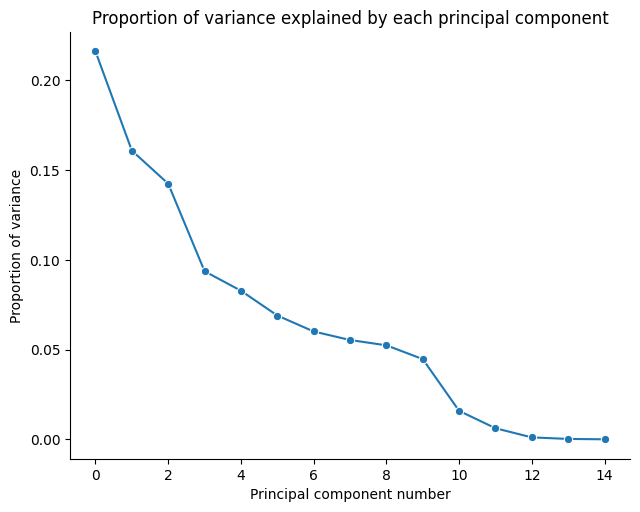

In [20]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [21]:
# Set the variable elbow to where you believe the elbow is
elbow = 6

Let's make a DataFrame containing these principle components

In [22]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_songs_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
artist,,,,,,,
Gilberto Gil,-0.714099,-0.651514,0.296615,0.448716,0.526819,-0.148704,-0.031477
Antônio Carlos Jobim,0.428080,-0.589060,-0.174867,-0.236938,-0.249977,0.136490,-0.349042
Martinho Da Vila,0.441264,-0.883052,0.148266,-0.205434,-0.211738,0.149500,-0.481404
Chico César,0.396769,-0.692878,0.255920,-0.044754,0.015518,0.063185,0.184659
Kurt Elling,0.376352,-0.531861,0.651745,0.166812,-0.299308,0.041757,-0.179602
...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,0.374709,0.362891,0.474923,-0.116670,0.563576,0.047839,0.422183
Tristan Murail,0.329561,0.130974,0.627175,0.237269,0.317952,-0.442318,0.098543
Arnold Schoenberg,0.264605,0.316930,0.898160,0.475063,0.452362,-0.138868,-0.002304


####3.1.2.&nbsp; Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [23]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.21598428, 0.37674569, 0.51905965, 0.61264096, 0.69538267,
       0.76431922, 0.8243669 , 0.87966882, 0.93200886, 0.97667989,
       0.99252882, 0.99870114, 0.99977294, 1.        , 1.        ])

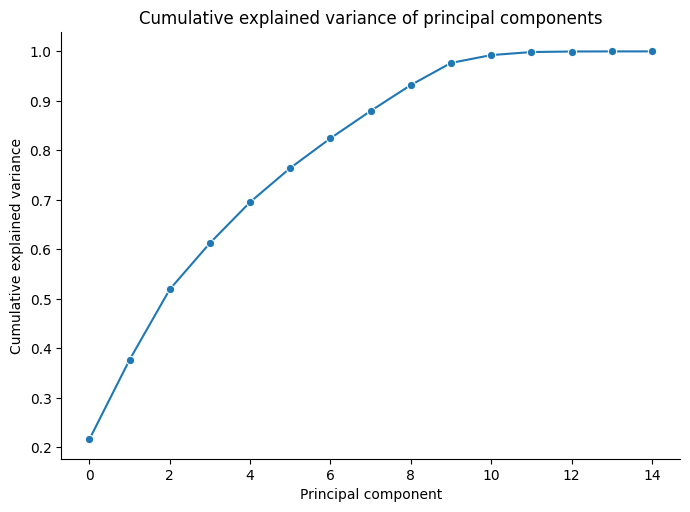

In [24]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [25]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

Let's visualise this threshold

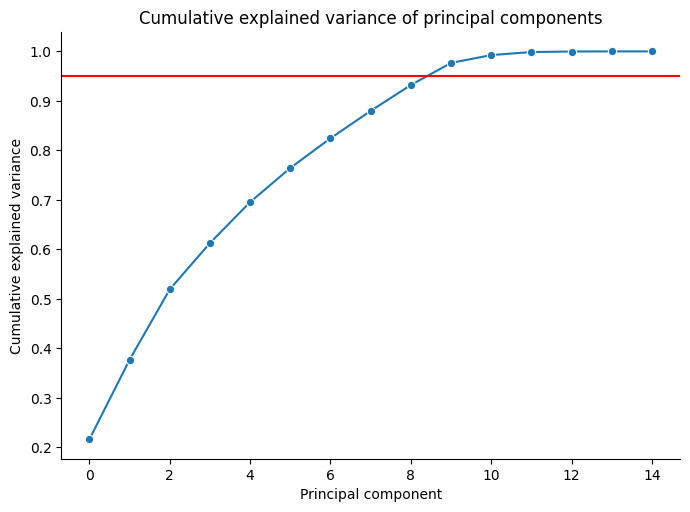

In [26]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

Let's apply this to our scaled data

In [27]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_songs_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
artist,,,,,,,,,,
Gilberto Gil,-0.714099,-0.651514,0.296615,0.448716,0.526819,-0.148704,-0.031477,0.023832,-0.527989,0.029926
Antônio Carlos Jobim,0.428080,-0.589060,-0.174867,-0.236938,-0.249977,0.136490,-0.349042,-0.042594,-0.116317,0.064130
Martinho Da Vila,0.441264,-0.883052,0.148266,-0.205434,-0.211738,0.149500,-0.481404,0.138636,0.071277,0.038064
Chico César,0.396769,-0.692878,0.255920,-0.044754,0.015518,0.063185,0.184659,-0.083901,-0.217529,0.125592
Kurt Elling,0.376352,-0.531861,0.651745,0.166812,-0.299308,0.041757,-0.179602,-0.309288,0.030366,0.206552
...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,0.374709,0.362891,0.474923,-0.116670,0.563576,0.047839,0.422183,0.204719,0.378750,-0.162165
Tristan Murail,0.329561,0.130974,0.627175,0.237269,0.317952,-0.442318,0.098543,0.276479,0.306124,-0.233257
Arnold Schoenberg,0.264605,0.316930,0.898160,0.475063,0.452362,-0.138868,-0.002304,0.385920,0.351656,0.268410


###3.2.&nbsp; Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.

In [28]:
X, _ = make_blobs(n_samples = 1000,
                  n_features = 80,
                  centers = 30,
                  random_state = 123)

blobs_df = pd.DataFrame(X)

blobs_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-1.701211,-6.399239,-7.729052,2.265238,8.432041,9.277738,-3.215520,8.544695,6.099043,0.014891,...,9.396956,5.661922,2.934566,3.170368,-7.399278,-0.832894,-0.999056,-8.342735,-10.092994,-10.179048
1,6.278723,-1.685660,-8.218419,1.232155,4.975136,3.283750,-7.377526,-2.714595,-3.882671,-1.899557,...,5.466632,2.652671,-9.222847,9.538737,-7.463871,2.315972,-2.579873,8.930986,9.458209,-4.704239
2,0.362480,6.060881,8.326247,-8.100459,3.719719,5.852855,-3.622466,10.132258,-4.990926,-10.128942,...,-4.794613,-5.285732,2.524211,-0.303708,-3.738831,-8.620748,0.995726,-3.263961,-1.606649,-2.287265
3,-7.898993,7.340964,8.437767,1.638283,-10.638737,-5.494111,4.355004,6.773989,-1.184502,-2.607903,...,0.693676,2.874440,4.808158,-6.888949,7.978908,1.088713,-8.015163,3.873678,-6.091533,-9.308514
4,-1.966892,4.560141,0.305921,-9.505989,2.049690,4.833094,-3.366090,6.964881,6.073835,-0.826616,...,-6.015234,-5.711455,-4.577501,6.368909,7.408595,-10.217053,-3.956262,9.250847,0.802116,3.455974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.037868,-1.052171,-1.696614,-3.589264,1.354960,-7.171995,-6.449717,7.796660,-7.974470,9.057194,...,0.628226,8.164277,0.225216,5.006440,-8.500344,8.669795,9.208054,-4.265727,5.286935,4.811373
996,4.966277,-1.962102,-0.405020,-5.171068,1.487542,-8.193387,-5.577824,6.705522,-9.944412,7.558356,...,3.103869,9.523761,-1.618870,5.583400,-11.195325,7.614480,8.127628,-4.248268,4.068702,7.036022
997,3.113358,-6.218700,-7.158985,3.228768,3.312216,-0.032758,8.548647,4.993490,0.905350,-1.923980,...,-7.073941,8.812679,3.583802,5.988114,-8.865571,-0.392879,1.778686,-6.369937,-7.159916,2.437978
998,-3.098527,0.416230,-9.574874,6.547465,8.146674,0.221676,-4.811377,8.627207,-2.746769,2.801459,...,-7.886887,2.117376,-0.069422,-7.265878,-9.514596,-1.640425,2.925496,-2.944405,-2.298123,6.162888


Scale our created data

In [29]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_blobs_df = my_min_max.fit_transform(blobs_df)

Perform PCA on our scaled data

In [30]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_blobs_df)

PCA()

Extract the explained variance for each Principal Component

In [31]:
explained_blobs_variance_array = pca.explained_variance_ratio_

Plot the cumulative sum of the extracted variances

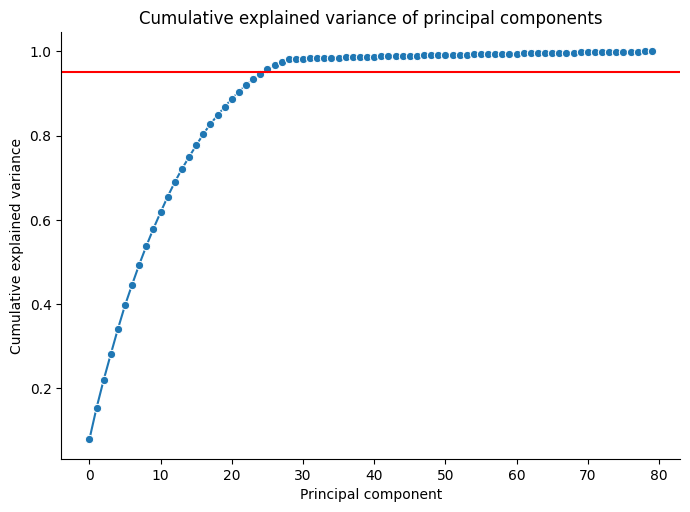

In [32]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

Find out how many components make up 95% of the variance

In [33]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

26


In this example, we were able to successfully reduce an 80-dimensional dataset to a more manageable 26-dimensional representation. This significant reduction in dimensionality not only helps to minimize noise but also substantially improves training times.